# Hotel Reservations Cancellation Prediction

Mục tiêu của dự án này là dự đoán các đặt phòng có thể bị khách hàng hủy bằng cách phân tích các tính năng và biến số khác nhau liên quan đến đặt phòng.

Thông tin của bộ dữ liệu

| Column Name | Description |
| --- | --- |
|Boking_ID|ID của đơn đặt phòng|
|no_of_adults|số lượng người lớn|
|no_of_children|số lượng trẻ em|
|no_of_weekend_nights|số đêm cuối tuần ở khách sạn (T7, CN)|
|no_of_week_nights|số đêm trong tuần ở khách sạn|
|meal_type|loại bữa ăn|
|required_car_parking_spaces|yêu cầu khu vự đỗ xe (0-no, 1-yes)|
|lead_time|số ngày từ ngày đặt đến ngày đến|
|arrival_year|năm|
|arrival_month|tháng|
|arrival_date|ngày|
|market_segment|cách đặt vé|
|repeated_guest|khách hàng thường xuyên (0-no, 1-yes)|
|no_previous_cancellations|số lượng phòng đã hủy trước khi đặt|
|previous_bookings_not_canceled|số lượng đặt chỗ trước đó không được khách hàng hủy trước lần đặt chỗ hiện tại|
|avg_price_per_room|giá trung bình mỗi phòng (euro)|
|no_of_special_requests|tổng số yêu cầu đặc biệt|
|booking_status|trạng thái có hủy hay không|


In [66]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [67]:
#Loading the dataset
df = pd.read_csv('data//Hotel Reservations.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## Data Preprocessing

In [68]:
df.shape

(36275, 19)

In [69]:
#Dropping the identifier column
df.drop(['Booking_ID'], axis=1, inplace=True)

In [71]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [73]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [74]:
df.dropna(inplace=True)
df.reset_index()

,index,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [75]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [76]:
df.nunique()

no_of_adults                               5
no_of_children                             6
no_of_weekend_nights                       8
no_of_week_nights                         18
type_of_meal_plan                          4
required_car_parking_space                 2
room_type_reserved                         7
lead_time                                352
arrival_year                               2
arrival_month                             12
arrival_date                              31
market_segment_type                        5
repeated_guest                             2
no_of_previous_cancellations               9
no_of_previous_bookings_not_canceled      59
avg_price_per_room                      3930
no_of_special_requests                     6
booking_status                             2
dtype: int64

In [77]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


min của avg_price_per_room và no_of_adults = 0. Vô lý

In [78]:
df['avg_price_per_room'].replace(0,df['avg_price_per_room'].mean(), inplace=True)

C:\Users\Name\AppData\Local\Temp\ipykernel_21168\10096424.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['avg_price_per_room'].replace(0,df['avg_price_per_room'].mean(), inplace=True)


In [79]:
#drop where adults are 0
df.drop(df[df['no_of_adults'] == 0].index, inplace = True)

In [80]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36136.000000,36136.000000,36136.000000,36136.000000,36136.000000,36136.000000,36136.000000,36136.000000,36136.000000,36136.000000,36136.000000,36136.000000,36136.00000,36136.000000
mean,1.852059,0.097880,0.810272,2.203592,0.031077,85.182090,2017.820013,7.424424,15.589883,0.025736,0.023439,0.154002,105.05603,0.618414
std,0.506908,0.385097,0.870519,1.410836,0.173528,85.951426,0.384182,3.068408,8.740466,0.158349,0.369036,1.757515,32.65758,0.785564
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.50000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,81.00000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,100.00000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.12000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.00000,5.000000


### Trực quan hóa dữ liệu

Text(0.5, 1.0, 'Number of Children')

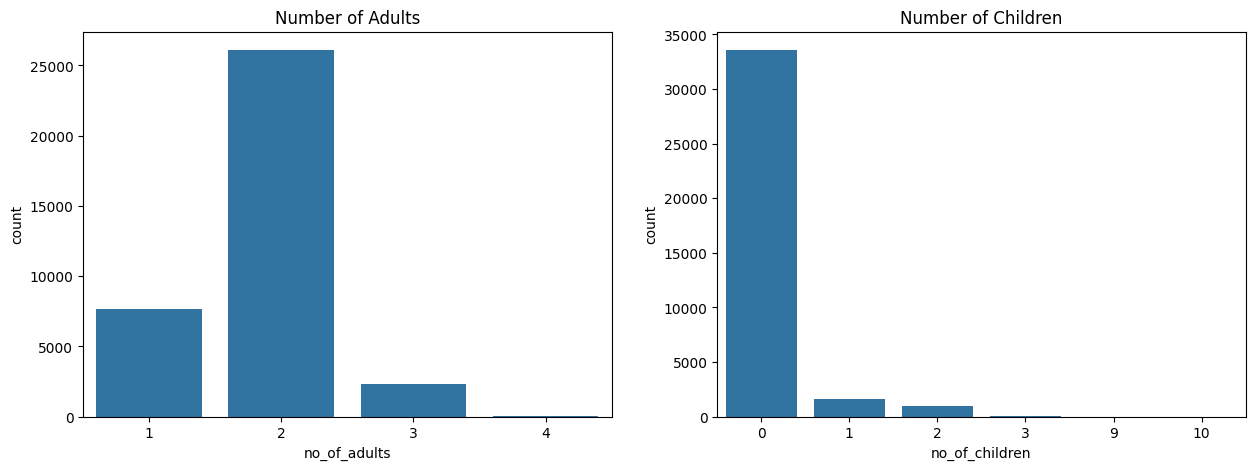

In [81]:
# Guest Information
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot( x = 'no_of_adults', data = df, ax=ax[0]).set_title('Number of Adults')
sns.countplot( x = 'no_of_children', data = df, ax=ax[1]).set_title('Number of Children')

hầu hết là 2 người lớn và không có trẻ em -> cặp đôi

Text(0.5, 1.0, 'Number of Week Nights')

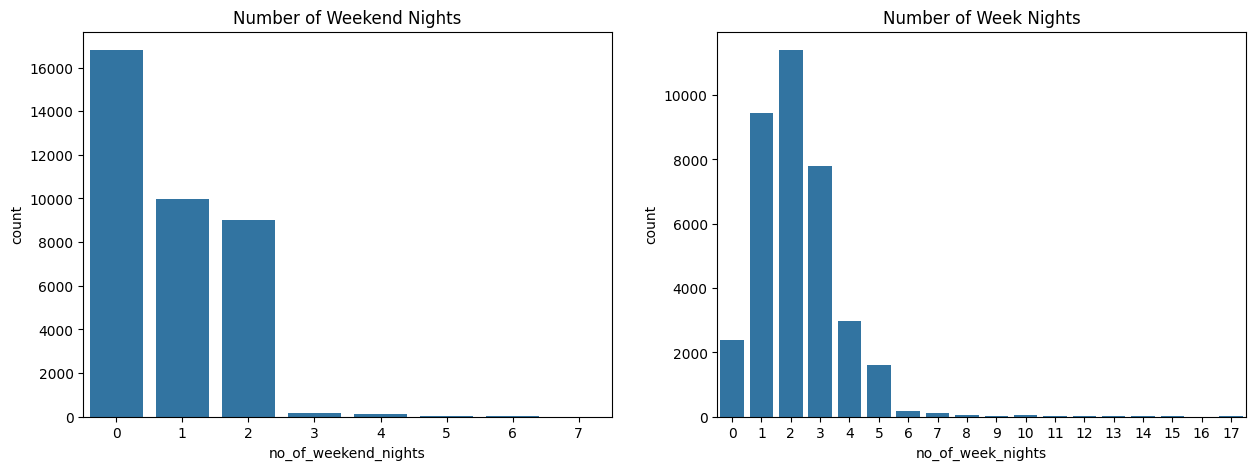

In [82]:
#Time Spent at Hotel
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x = 'no_of_weekend_nights', data = df, ax=ax[0]).set_title('Number of Weekend Nights')
sns.countplot(x = 'no_of_week_nights', data = df, ax=ax[1]).set_title('Number of Week Nights')

Text(0.5, 1.0, 'Number of special requests')

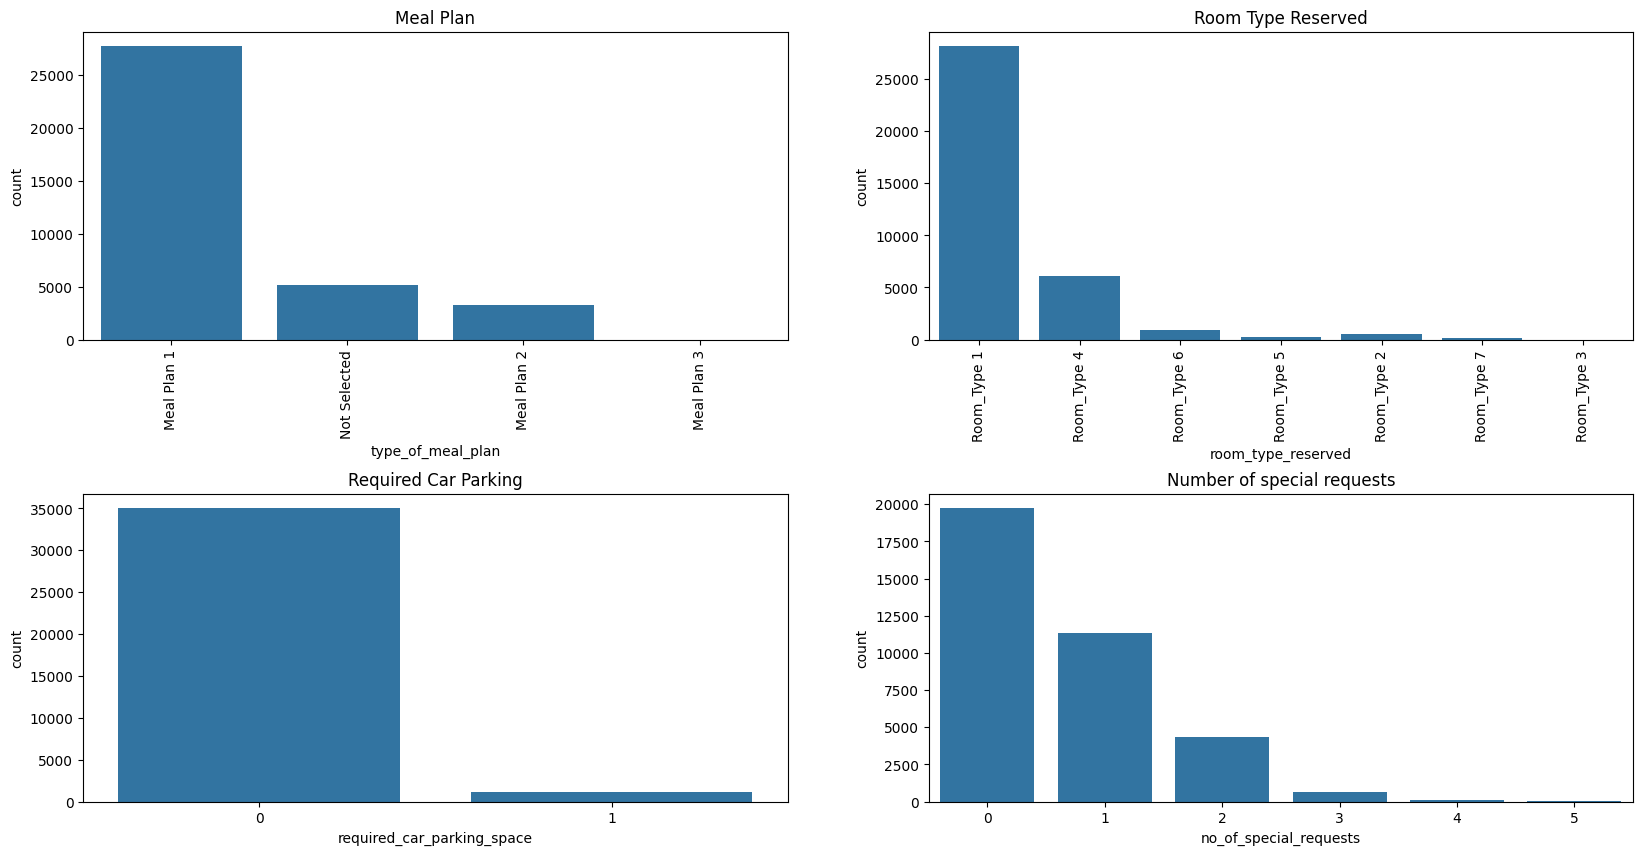

In [84]:
#Services
fig, ax = plt.subplots(2,2,figsize=(20,10))
fig.subplots_adjust(hspace=0.5)

sns.countplot(x = 'type_of_meal_plan', data = df, ax=ax[0,0]).set_title('Meal Plan')
ax[0,0].xaxis.set_tick_params(rotation=90)

sns.countplot(x = 'room_type_reserved', data = df, ax=ax[0,1]).set_title('Room Type Reserved')
ax[0,1].xaxis.set_tick_params(rotation=90)

sns.countplot(x = 'required_car_parking_space', data = df, ax=ax[1,0]).set_title('Required Car Parking')

sns.countplot(x = 'no_of_special_requests', data = df, ax=ax[1,1]).set_title('Number of special requests')

Đa số là phòng loại 1 và bữa ăn loại 1, không yêu cầu chỗ để xe và không có yêu cầu đặc biệt nào khác. Có thể thấy khách hàng thường đi taxi hoặc phương tiện công cộng tới khách sạn

Text(0.5, 1.0, 'Lead Time in days')

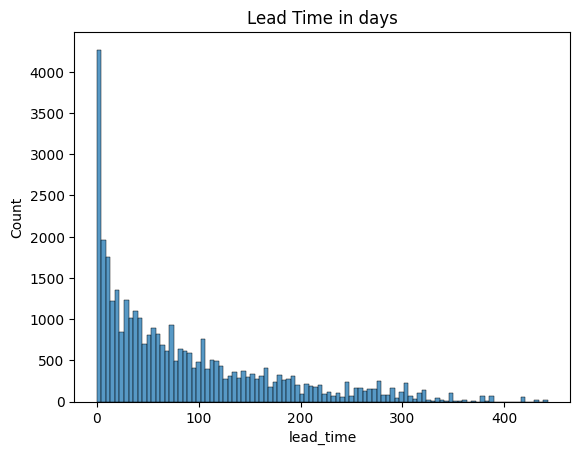

In [85]:
#Lead time 
sns.histplot(x = 'lead_time', data = df, bins=100).set_title('Lead Time in days')

Chiếm nhiều nhất là đặt phòng trước 1 ngày hoặc trong ngày đến 

Text(0.5, 1.0, 'Market Segment Type')

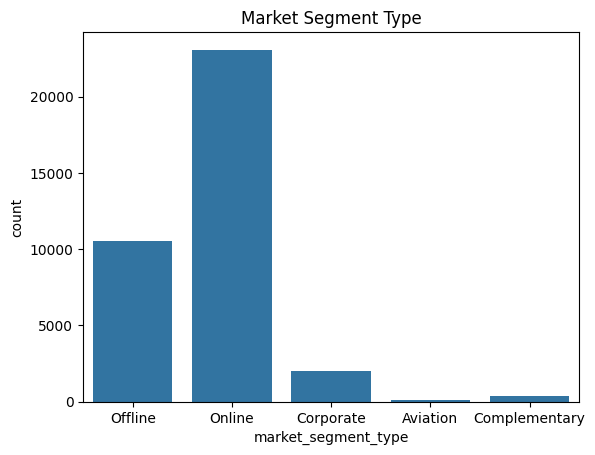

In [86]:
#Market Segment
sns.countplot(x = 'market_segment_type', data = df).set_title('Market Segment Type')

phần lớn là đặt online -> khách sạn khá nổi tiếng trên các nền tảng du lịch. Cách đặt phòng phổ biến thứ hai là mua trực tiếp

Text(0.5, 1.0, 'Number of Previous Bookings Not Cancelled')

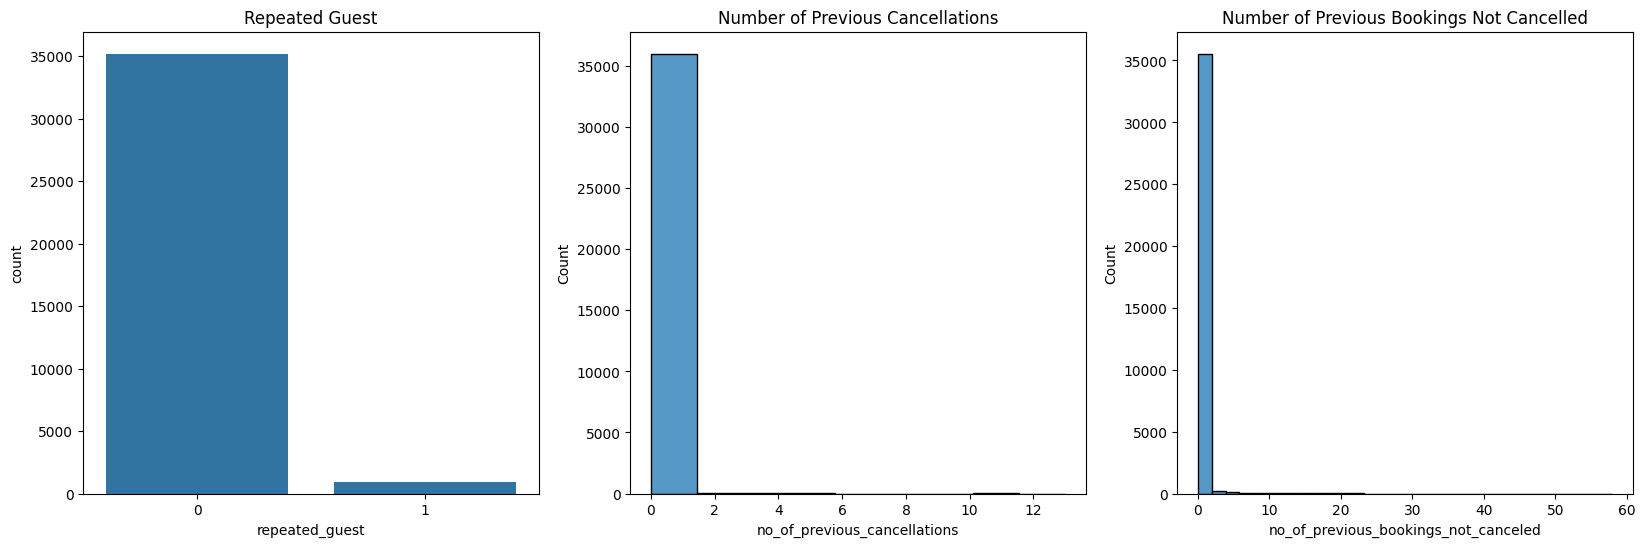

In [87]:
#Guest's previous experience with the hotel(trải nhiệm trước đây vs khách sạn)
fig, ax = plt.subplots(1,3,figsize=(20,6))

sns.countplot(x = 'repeated_guest', data = df, ax=ax[0]).set_title('Repeated Guest')

sns.histplot(x = 'no_of_previous_cancellations', data = df, ax=ax[1], bins = 9).set_title('Number of Previous Cancellations')

sns.histplot(x = 'no_of_previous_bookings_not_canceled', data = df, ax=ax[2], bins = 30).set_title('Number of Previous Bookings Not Cancelled')

chủ yếu là khách hàng mới. Ít giữ chân được khacs hàng cũ -> vấn đề giữ chân khách hàng

In [88]:
# Average room price

Text(0.5, 1.0, 'Average Room Price')

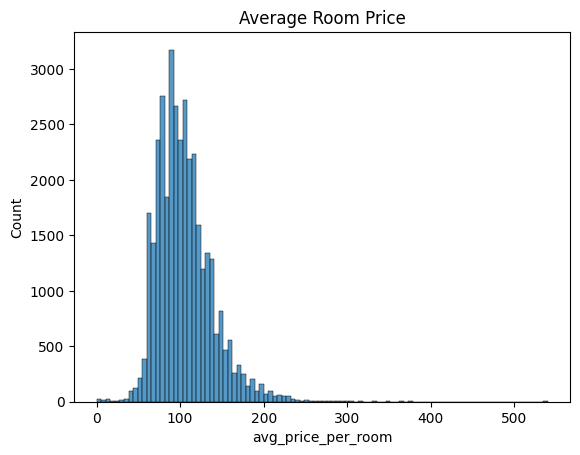

In [89]:
sns.histplot(x = 'avg_price_per_room', data = df, bins = 100).set_title('Average Room Price')

Xem xét các mỗi quan hệ giữa các biết với biết mục tiêu

Text(0.5, 1.0, 'Number of Children')

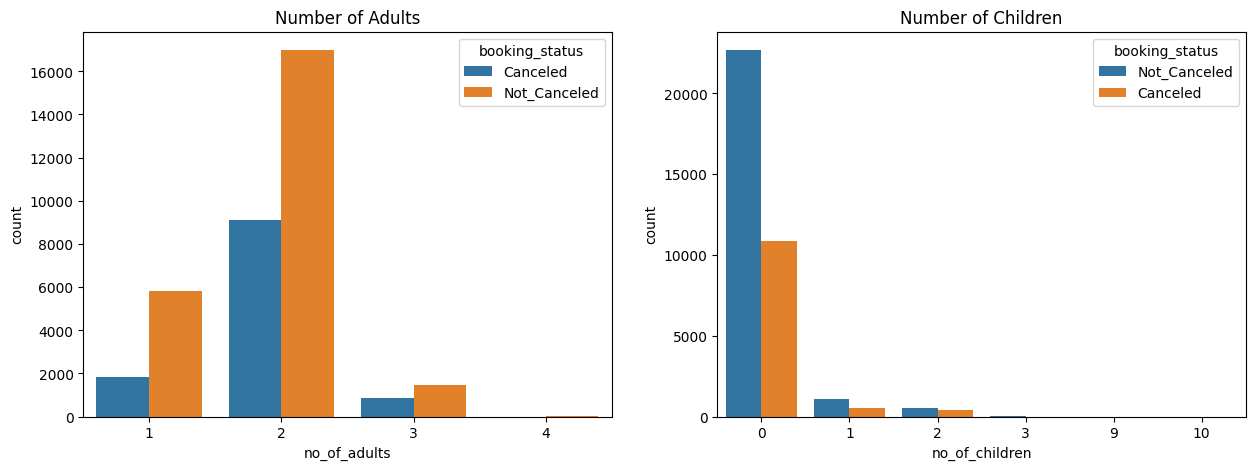

In [90]:
# Guest Information and Cancellation
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot( x = 'no_of_adults', data = df, ax=ax[0], hue= 'booking_status').set_title('Number of Adults')
sns.countplot( x = 'no_of_children', data = df, ax=ax[1], hue = 'booking_status').set_title('Number of Children')

số lượng phòng hủy giảm khi phòng có trên 2 người lớn và có trẻ em

Text(0.5, 1.0, 'Number of Week Nights')

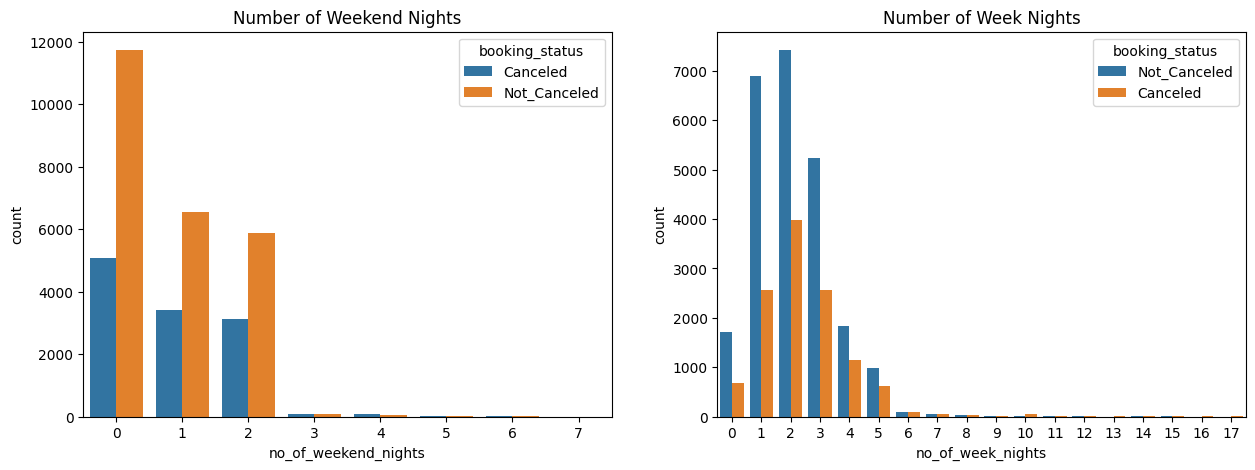

In [91]:
# Time Spent at Hotel and Cancellation
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x = 'no_of_weekend_nights', data = df, ax=ax[0], hue = 'booking_status').set_title('Number of Weekend Nights')
sns.countplot(x = 'no_of_week_nights', data = df, ax=ax[1], hue = 'booking_status').set_title('Number of Week Nights')

việc đặt phòng được thực hiện cho 1 hoặc 2 đêm cuối tuần có tỷ lệ bị hủy thấp hơn. So với viêc phòng được đặt cho 2 ngày trong tuần tại khách sạn có số lần hủy cao nhất, tiếp theo là 1 và 3 ngày trong tuần. Điều này có thể có nghĩa là khách có thể hủy đặt phòng nếu họ dự định ở lại vào các ngày trong tuần và dưới 3 ngày. Tuy nhiên, con số này thấp hơn khi đặt chỗ vào cuối tuần.

Text(0.5, 1.0, 'Number of special requests')

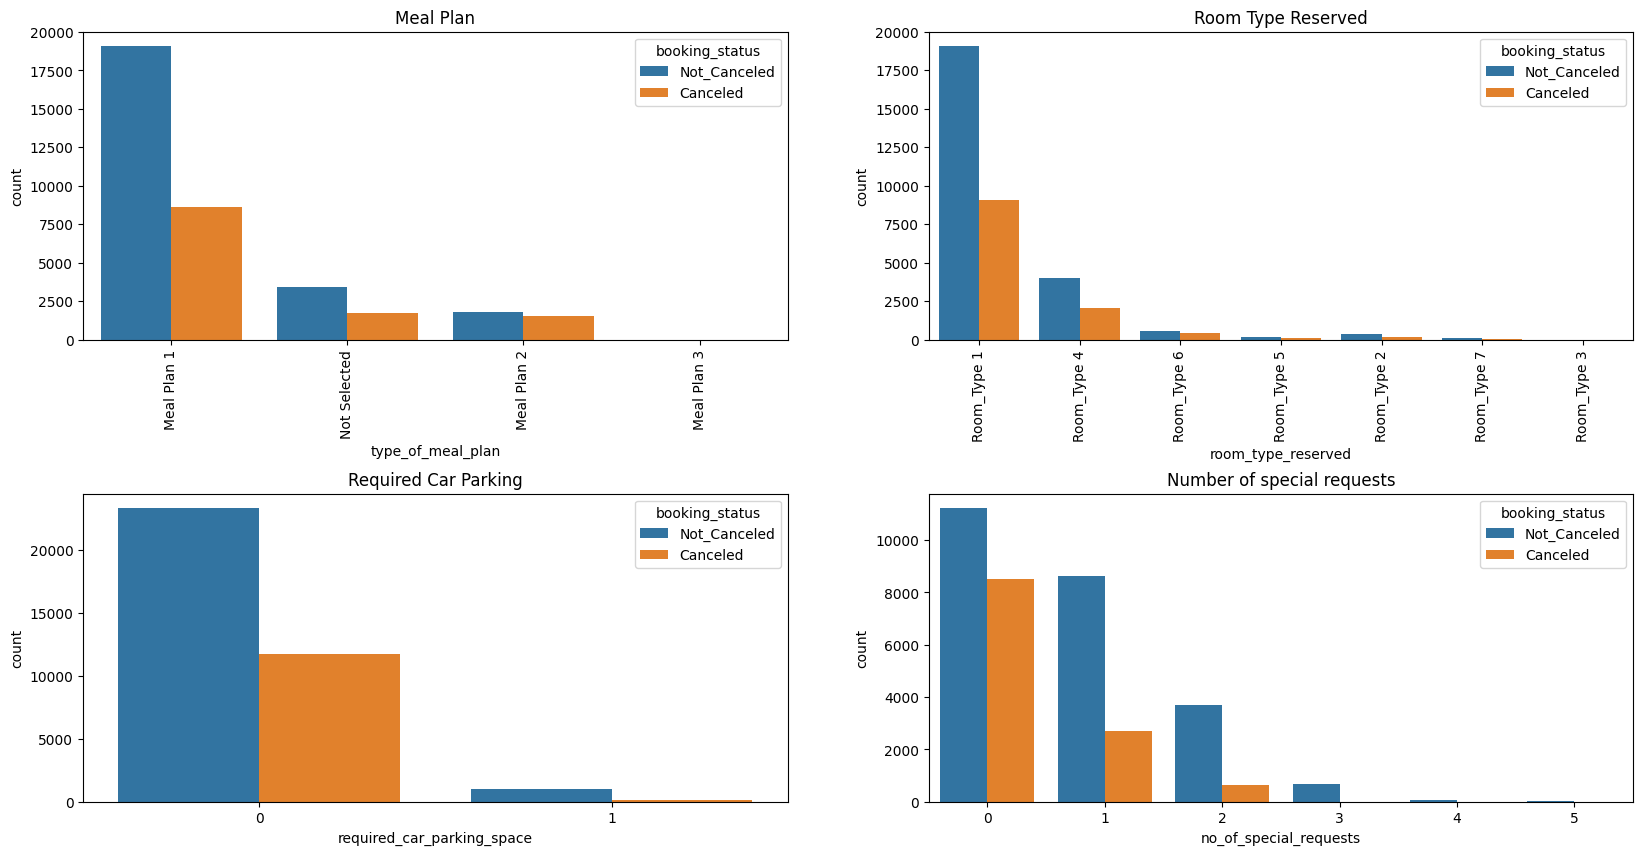

In [92]:
# Services and Cancellation
fig, ax = plt.subplots(2,2,figsize=(20,10))
fig.subplots_adjust(hspace=0.5)

sns.countplot(x = 'type_of_meal_plan', data = df, ax=ax[0,0], hue = 'booking_status').set_title('Meal Plan')
ax[0,0].xaxis.set_tick_params(rotation=90)

sns.countplot(x = 'room_type_reserved', data = df, ax=ax[0,1], hue = 'booking_status').set_title('Room Type Reserved')
ax[0,1].xaxis.set_tick_params(rotation=90)

sns.countplot(x = 'required_car_parking_space', data = df, ax=ax[1,0], hue = 'booking_status').set_title('Required Car Parking')

sns.countplot(x = 'no_of_special_requests', data = df, ax=ax[1,1], hue = 'booking_status').set_title('Number of special requests')

Trong biểu đồ trên, chúng ta có thể thấy tỷ lệ đặt phòng bị hủy và không bị hủy gần như giống nhau đối với tất cả các dịch vụ. Vì vậy, tôi có thể kết luận rằng các dịch vụ do khách sạn cung cấp không ảnh hưởng gì đến việc hủy đặt phòng.

Text(0.5, 1.0, 'Lead Time in days')

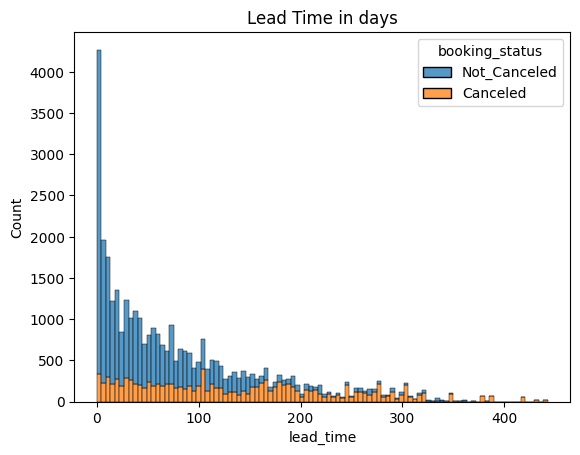

In [93]:
# Lead time and Cancellation
sns.histplot(x = 'lead_time', data = df, bins=100, hue = 'booking_status', multiple = 'stack').set_title('Lead Time in days')

thời gian đặt phòng càng lâu thì tỉ lệ hủy càng tăng

Text(0.5, 1.0, 'Market Segment Type')

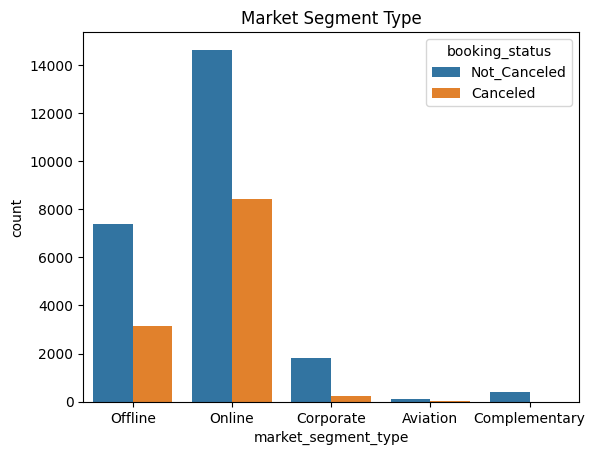

In [94]:
# Market Segment and Cancellation
sns.countplot(x = 'market_segment_type', data = df, hue = 'booking_status').set_title('Market Segment Type')

Hầu hết các đặt phòng được thực hiện thông qua các nền tảng trực tuyến và do đó có số lần hủy nhiều nhất. Phân khúc thị trường phổ biến thứ hai là ngoại tuyến, có số lượng hủy nhiều thứ hai

Text(0.5, 1.0, 'Repeated Guest')

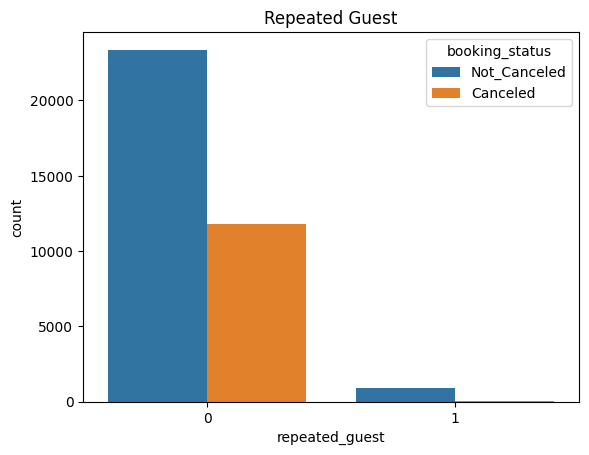

In [95]:
# Guest's previous experience and Cancellation
sns.countplot(x = 'repeated_guest', data = df, hue = 'booking_status').set_title('Repeated Guest')

khách hàng đã từng sử dụng dịch vụ có tỉ lệ hủy ít hơn khách mới

Text(0.5, 1.0, 'Average Room Price')

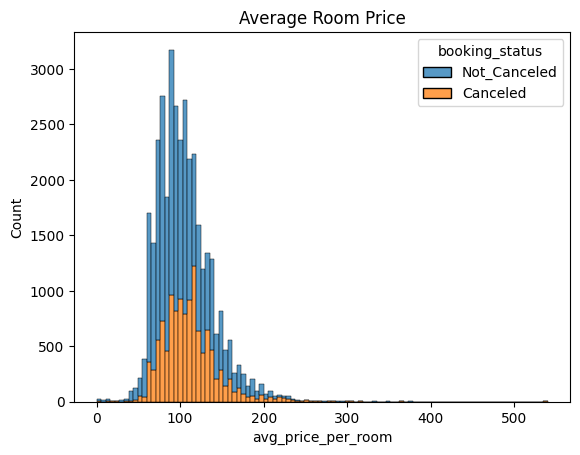

In [96]:
# Average room price and Cancellation
sns.histplot(x = 'avg_price_per_room', data = df, bins = 100, hue = 'booking_status', multiple = 'stack').set_title('Average Room Price')

### Model Building

In [97]:
# label encode

from sklearn.preprocessing import LabelEncoder
#label encoding object
le = LabelEncoder()

#columns to be encoded
cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']

#label encoding
for col in cols:
    le.fit(df[col])
    df[col] = le.transform(df[col])
    print(col, df[col].unique())

type_of_meal_plan [0 3 1 2]
room_type_reserved [0 3 5 4 1 6 2]
market_segment_type [3 4 2 0 1]
booking_status [1 0]


In [98]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
#standardizing the data
scaler = StandardScaler()
df[['lead_time', 'avg_price_per_room']] = scaler.fit_transform(df[['lead_time', 'avg_price_per_room']])

<Axes: >

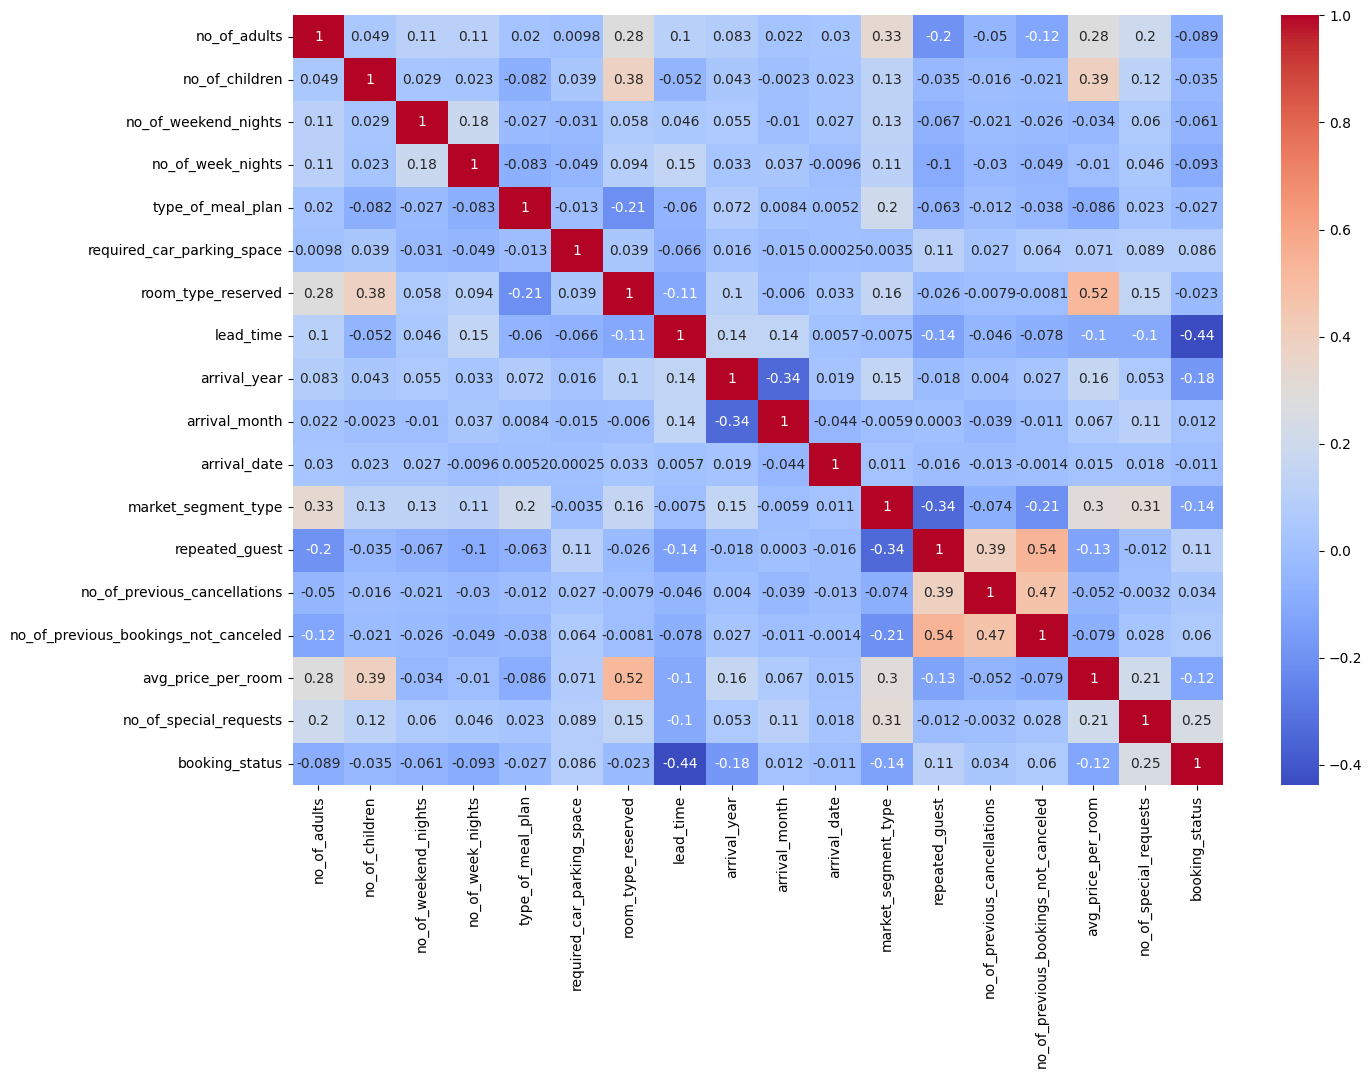

In [99]:
# Correlation Matrix Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

### Train Test Split

Sử dụng các mô hình
- Decision Tree Classifier
- Random Forest Classifier
- Logistic Regression
- Support Vector Classifier

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('booking_status', axis=1), df['booking_status'], test_size=0.2, random_state=42)

In [107]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

#decision tree classifier Object
dtree = DecisionTreeClassifier()

#Training the model
dtree.fit(X_train, y_train)

#Training accuracy
print(dtree.score(X_train, y_train))

#Predicting the test set results
d_pred = dtree.predict(X_test)

print('Decision Tree')
print('Accuracy Score: ', accuracy_score(y_test, d_pred))

0.9940154974401549
Decision Tree
Accuracy Score:  0.8599889319313779


In [108]:
# logictic
from sklearn.linear_model import LogisticRegression

#logistic regression object
logreg = LogisticRegression()

#logistic regression object with best parameters
logreg = LogisticRegression(C=1, penalty='l2', random_state=0, solver='liblinear')

#Training the model
logreg.fit(X_train, y_train)

#Training accuracy
print(logreg.score(X_train, y_train))

#Predicting the test set results
l_pred = logreg.predict(X_test)

#logistic regression
print('Logistic Regression')
print('Accuracy Score: ', accuracy_score(y_test, l_pred))

0.8027535630275356
Logistic Regression
Accuracy Score:  0.7888765910348644


In [109]:
#random forest
from sklearn.ensemble import RandomForestClassifier

#random forest classifier object
rfc = RandomForestClassifier()

#random forest classifier object with best parameters
rfc = RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4, min_samples_split=2, random_state=0)

#Training the model
rfc.fit(X_train, y_train)

#Training accuracy
print(rfc.score(X_train, y_train))

#Predicting the test set results
r_pred = rfc.predict(X_test)

#random forest
print('Random Forest')
print('Accuracy Score: ', accuracy_score(y_test, r_pred))

0.8618721461187214
Random Forest
Accuracy Score:  0.8518262313226342


In [106]:
from sklearn.metrics import classification_report

#decision tree
print('Decision Tree')
print(classification_report(y_test, d_pred))
#random forest
print('Random Forest')
print(classification_report(y_test, r_pred))
#logistic regression
print('Logistic Regression')
print(classification_report(y_test, l_pred))

Decision Tree
              precision    recall  f1-score   support

           0       0.77      0.80      0.78      2319
           1       0.90      0.89      0.89      4909

    accuracy                           0.86      7228
   macro avg       0.84      0.84      0.84      7228
weighted avg       0.86      0.86      0.86      7228

Random Forest
              precision    recall  f1-score   support

           0       0.85      0.66      0.74      2319
           1       0.85      0.94      0.90      4909

    accuracy                           0.85      7228
   macro avg       0.85      0.80      0.82      7228
weighted avg       0.85      0.85      0.85      7228

Logistic Regression
              precision    recall  f1-score   support

           0       0.71      0.58      0.64      2319
           1       0.82      0.89      0.85      4909

    accuracy                           0.79      7228
   macro avg       0.76      0.73      0.75      7228
weighted avg       0.78   

### Model Comparison

Text(0.5, 1.0, 'Mean Squared Error')

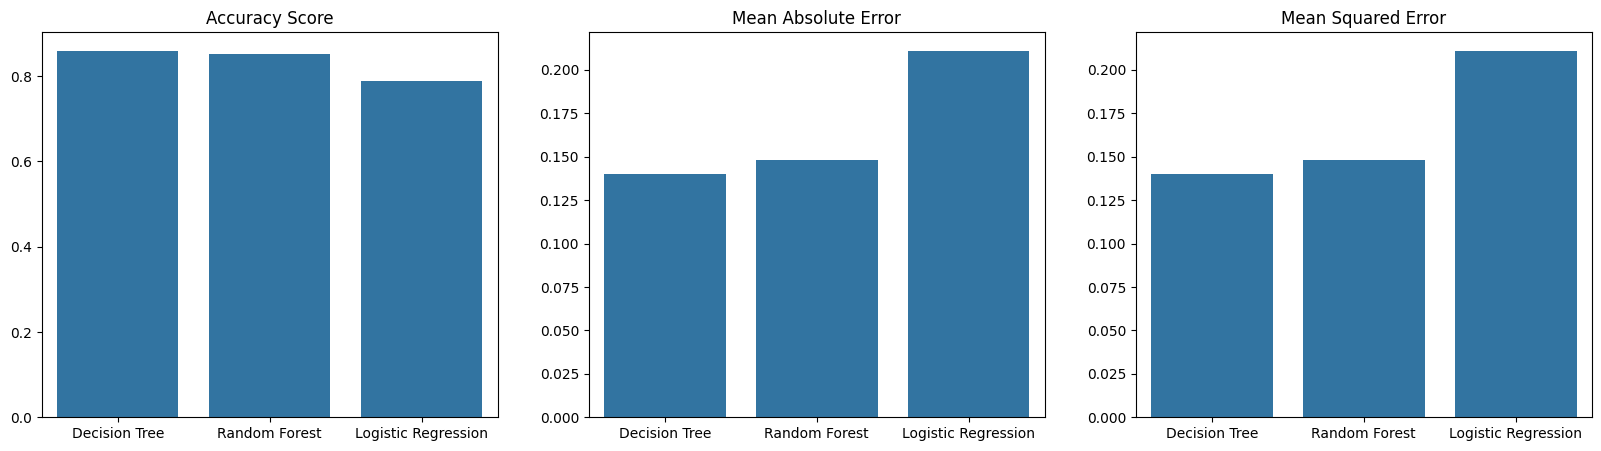

In [110]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
#Accuracy Score
sns.barplot(x = ['Decision Tree', 'Random Forest', 'Logistic Regression'], y = [accuracy_score(y_test, d_pred), accuracy_score(y_test, r_pred), accuracy_score(y_test, l_pred)], ax=ax[0]).set_title('Accuracy Score')
#Mean Absolute Error
sns.barplot(x = ['Decision Tree', 'Random Forest', 'Logistic Regression'], y = [mean_absolute_error(y_test, d_pred), mean_absolute_error(y_test, r_pred), mean_absolute_error(y_test, l_pred)], ax=ax[1]).set_title('Mean Absolute Error')
#Mean Squared Error
sns.barplot(x = ['Decision Tree', 'Random Forest', 'Logistic Regression'], y = [mean_squared_error(y_test, d_pred), mean_squared_error(y_test, r_pred), mean_squared_error(y_test, l_pred)], ax=ax[2]).set_title('Mean Squared Error')

### Kết luận

Từ phân tích dữ liệu khám phá, tôi nhận ra rằng hầu hết các đặt phòng được thực hiện cho 2 người lớn không có trẻ em, có thể là các cặp đôi, có tỷ lệ hủy cao nhất. Ngoài ra, số lượng hủy đặt phòng giảm khi có trẻ em tham gia. Phần lớn đặt phòng được thực hiện cho các đêm trong tuần và có tỷ lệ hủy cao hơn nhiều so với các đêm cuối tuần.

Năm 2018 có tỷ lệ hủy cao hơn so với năm 2017, chủ yếu vào tháng 7 và tháng 10. Việc trực quan hóa các dịch vụ được chọn trong quá trình đặt phòng cho thấy rằng các dịch vụ này không ảnh hưởng đến việc hủy đặt phòng.

Thời gian chờ (lead time) có ảnh hưởng lớn đến việc hủy đặt phòng. Khách có thời gian chờ ngắn ít có khả năng hủy đặt phòng hơn so với khách có thời gian chờ dài. Do đó, khách sạn nên cố gắng nhận đặt phòng với thời gian chờ ngắn hơn.

Phân khúc thị trường của đặt phòng cũng ảnh hưởng đến việc hủy đặt phòng. Các đặt phòng qua các nền tảng trực tuyến có tỷ lệ hủy cao nhất, điều này phản ánh uy tín và sự hiện diện của khách sạn trên các nền tảng này. Khách sạn nên cải thiện uy tín của mình trên các nền tảng trực tuyến để giảm tỷ lệ hủy đặt phòng.

Về các mô hình phân loại, tôi đã sử dụng Cây Quyết định, Rừng Ngẫu nhiên, và Hồi quy Logistic để dự đoán việc hủy đặt phòng. Cây Quyết định có độ chính xác cao nhất là 85% trong số tất cả các mô hình.